In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [687]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [688]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [689]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699292 entries, 0 to 1699291
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 25.9 MB


In [690]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1699287    0.55
1699288    0.56
1699289    0.55
1699290    0.55
1699291    0.55
Name: kWh, Length: 1699292, dtype: float64

In [691]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1699287    0.55
1699288    0.56
1699289    0.55
1699290    0.55
1699291    0.55
Name: kWh, Length: 1699292, dtype: float64

In [692]:
l=len(conso_data)-1
l

1699291

In [693]:
conso_data['sec']=conso_data['Interval']/1000


In [694]:
conso_data['Wh']=3600000/conso_data['Interval']


In [695]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [696]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699292 entries, 0 to 1699291
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 64.8 MB


In [697]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1699287,6525,0.55,6.525,551.724138,41961207239
1699288,6448,0.56,6.448,558.312655,41961213687
1699289,6530,0.55,6.530,551.301685,41961220217
1699290,6545,0.55,6.545,550.038197,41961226762
1699291,6571,0.55,6.571,547.861817,41961233333


In [698]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

41961233333000

In [699]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 57, 11, 149384)

In [700]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [701]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [702]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [703]:
conso_data['dates']

0         2023-08-21 19:57:33.083384
1         2023-08-21 19:57:54.941384
2         2023-08-21 19:58:16.942384
3         2023-08-21 19:58:38.870384
4         2023-08-21 19:59:00.761384
                     ...            
1699287   2024-12-19 11:50:38.388384
1699288   2024-12-19 11:50:44.836384
1699289   2024-12-19 11:50:51.366384
1699290   2024-12-19 11:50:57.911384
1699291   2024-12-19 11:51:04.482384
Name: dates, Length: 1699292, dtype: datetime64[ns]

## créer les dates

In [704]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:57:33.083384,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:57:54.941384,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:58:16.942384,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:58:38.870384,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:59:00.761384,21/08/23
...,...,...,...,...,...,...,...
1699287,6525,0.55,6.525,551.724138,41961207239,2024-12-19 11:50:38.388384,19/12/24
1699288,6448,0.56,6.448,558.312655,41961213687,2024-12-19 11:50:44.836384,19/12/24
1699289,6530,0.55,6.530,551.301685,41961220217,2024-12-19 11:50:51.366384,19/12/24
1699290,6545,0.55,6.545,550.038197,41961226762,2024-12-19 11:50:57.911384,19/12/24


### save conso_data with dates

In [705]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [706]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('19/12/24', 19, 12, 2024)

In [707]:
here = now.strftime('%H:%M:%S')
here

'11:51:42'

In [708]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [709]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 1698018 to 1699291
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1274 non-null   int64         
 1   kWh        1274 non-null   float64       
 2   sec        1274 non-null   float64       
 3   Wh         1274 non-null   float64       
 4   cumul(ms)  1274 non-null   int64         
 5   dates      1274 non-null   datetime64[ns]
 6   days       1274 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 79.6+ KB


In [710]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [711]:
data = list(df_grp['kWh'])
print(data)

[0.72, 3.701, 4.235, 3.688, 4.124, 4.568, 3.601, 3.429, 3.518, 3.688, 3.644, 3.925, 4.25, 3.648, 3.627, 3.636, 3.317, 3.383, 4.222, 4.016, 4.042, 3.962, 3.469, 4.381, 3.822, 3.755, 4.201, 4.732, 3.922, 3.222, 3.177, 3.905, 3.768, 3.119, 3.777, 4.159, 3.689, 3.663, 4.705, 4.246, 4.483, 3.813, 3.431, 4.305, 3.873, 3.825, 3.473, 4.067, 3.673, 3.401, 4.16, 3.376, 3.864, 3.84, 3.638, 3.752, 4.268, 3.284, 3.886, 3.038, 2.055, 2.041, 2.401, 4.085, 3.682, 4.346, 3.594, 3.951, 3.75, 3.837, 4.081, 4.075, 3.687, 3.135, 3.808, 3.525, 3.61, 3.667, 3.682, 3.301, 3.843, 3.261, 3.746, 3.656, 4.072, 3.564, 3.417, 3.732, 4.12, 4.335, 3.936, 4.189, 4.237, 3.769, 3.917, 3.836, 3.925, 3.71, 4.064, 4.362, 3.887, 3.502, 3.681, 3.676, 3.346, 3.844, 3.996, 4.101, 3.496, 4.166, 3.597, 3.986, 4.614, 3.646, 3.494, 3.565, 4.084, 3.77, 4.083, 3.992, 3.746, 3.596, 5.11, 3.723, 3.761, 4.237, 4.137, 4.597, 4.456, 4.05, 3.694, 4.353, 4.734, 4.138, 4.815, 4.358, 3.686, 4.19, 3.726, 3.696, 3.532, 3.908, 3.694, 3.712, 3.6

In [712]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [713]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [714]:
df = conso_data
len(df)

1699292

In [715]:
period(p=2)

2023-08-22 02:03:46.886384	2023-08-22 09:08:02.506384	7h 4m 15s 	2000


In [716]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.293881
dtype: float64

In [717]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.489306
dtype: float64

In [718]:
last=df_grp.iloc[-1]['kWh']
last

1.274

In [719]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 1698018 to 1699291
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1274 non-null   int64         
 1   kWh        1274 non-null   float64       
 2   sec        1274 non-null   float64       
 3   Wh         1274 non-null   float64       
 4   cumul(ms)  1274 non-null   int64         
 5   dates      1274 non-null   datetime64[ns]
 6   days       1274 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 79.6+ KB


In [720]:
# select day
day = today
#day = '16/08/24'


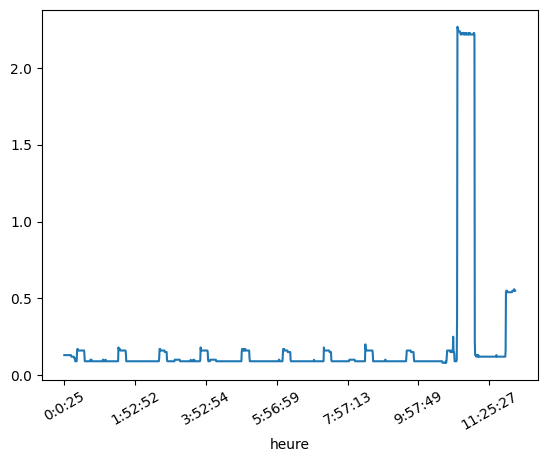

In [721]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [722]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:57:33.083384,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:57:54.941384,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:58:16.942384,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:58:38.870384,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:59:00.761384,21/08/23
...,...,...,...,...,...,...,...
1699287,6525,0.55,6.525,551.724138,41961207239,2024-12-19 11:50:38.388384,19/12/24
1699288,6448,0.56,6.448,558.312655,41961213687,2024-12-19 11:50:44.836384,19/12/24
1699289,6530,0.55,6.530,551.301685,41961220217,2024-12-19 11:50:51.366384,19/12/24
1699290,6545,0.55,6.545,550.038197,41961226762,2024-12-19 11:50:57.911384,19/12/24


In [723]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:25,27663,0.13,27.663,130.137729,41918594211,2024-12-19 00:00:25.360384,19/12/24
0:0:52,27294,0.13,27.294,131.897120,41918621505,2024-12-19 00:00:52.654384,19/12/24
0:1:20,27554,0.13,27.554,130.652537,41918649059,2024-12-19 00:01:20.208384,19/12/24
0:1:48,28256,0.13,28.256,127.406569,41918677315,2024-12-19 00:01:48.464384,19/12/24
0:2:16,28124,0.13,28.124,128.004551,41918705439,2024-12-19 00:02:16.588384,19/12/24
...,...,...,...,...,...,...,...
11:50:38,6525,0.55,6.525,551.724138,41961207239,2024-12-19 11:50:38.388384,19/12/24
11:50:44,6448,0.56,6.448,558.312655,41961213687,2024-12-19 11:50:44.836384,19/12/24
11:50:51,6530,0.55,6.530,551.301685,41961220217,2024-12-19 11:50:51.366384,19/12/24


In [724]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 19/11/24 4.542
Min : 03/12/24 3.117


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1698018,27663,0.13,27.663,130.137729,41918594211,2024-12-19 00:00:25.360384,19/12/24,0:0:25
1698019,27294,0.13,27.294,131.897120,41918621505,2024-12-19 00:00:52.654384,19/12/24,0:0:52
1698020,27554,0.13,27.554,130.652537,41918649059,2024-12-19 00:01:20.208384,19/12/24,0:1:20
1698021,28256,0.13,28.256,127.406569,41918677315,2024-12-19 00:01:48.464384,19/12/24,0:1:48
1698022,28124,0.13,28.124,128.004551,41918705439,2024-12-19 00:02:16.588384,19/12/24,0:2:16
...,...,...,...,...,...,...,...,...
1699287,6525,0.55,6.525,551.724138,41961207239,2024-12-19 11:50:38.388384,19/12/24,11:50:38
1699288,6448,0.56,6.448,558.312655,41961213687,2024-12-19 11:50:44.836384,19/12/24,11:50:44
1699289,6530,0.55,6.530,551.301685,41961220217,2024-12-19 11:50:51.366384,19/12/24,11:50:51
1699290,6545,0.55,6.545,550.038197,41961226762,2024-12-19 11:50:57.911384,19/12/24,11:50:57


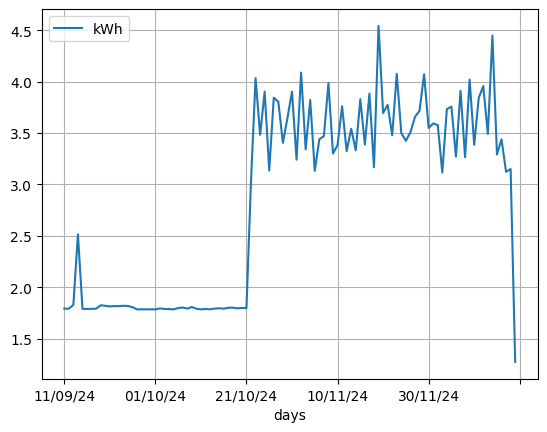

In [725]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-12-19 00:00:25.360384	2024-12-19 09:57:09.817384	9h 56m 44s 	1000
2024-12-19 09:57:09.817384	2024-12-19 11:51:04.482384	1h 53m 54s 	274
<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 1698018 to 1699291
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1274 non-null   int64         
 1   kWh        1274 non-null   float64       
 2   sec        1274 non-null   float64       
 3   Wh         1274 non-null   float64       
 4   cumul(ms)  1274 non-null   int64         
 5   dates      1274 non-null   datetime64[ns]
 6   days       1274 non-null   object        
 7   heure      1274 non-null   object        
 8   hours      1274 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 99.5+ KB


('19/12/24', <Axes: xlabel='hours'>)

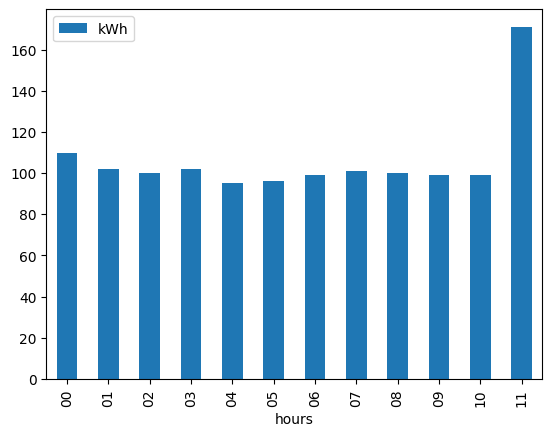

In [726]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [727]:
df_grp

,kWh
days,
21/08/23,0.720
22/08/23,3.701
23/08/23,4.235
24/08/23,3.688
25/08/23,4.124
...,...
15/12/24,3.292
16/12/24,3.439
17/12/24,3.123


In [728]:
# select number of days to display
span = 30
#df_grp.tail(span)


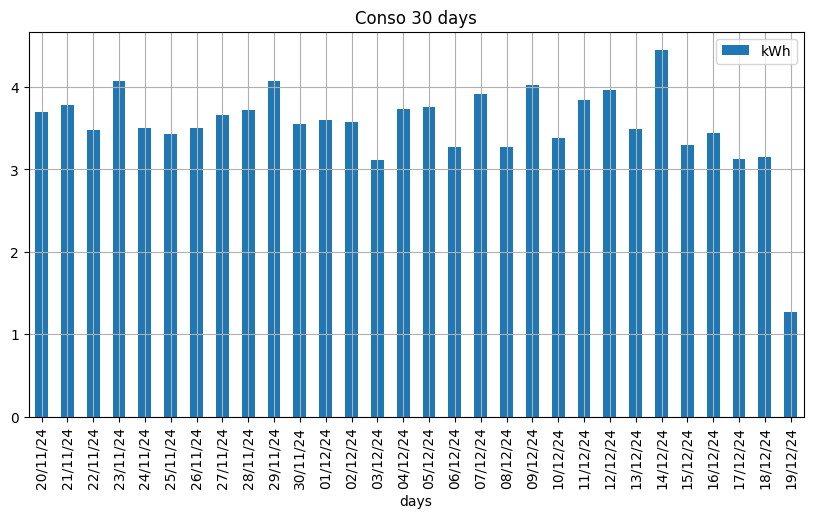

In [729]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


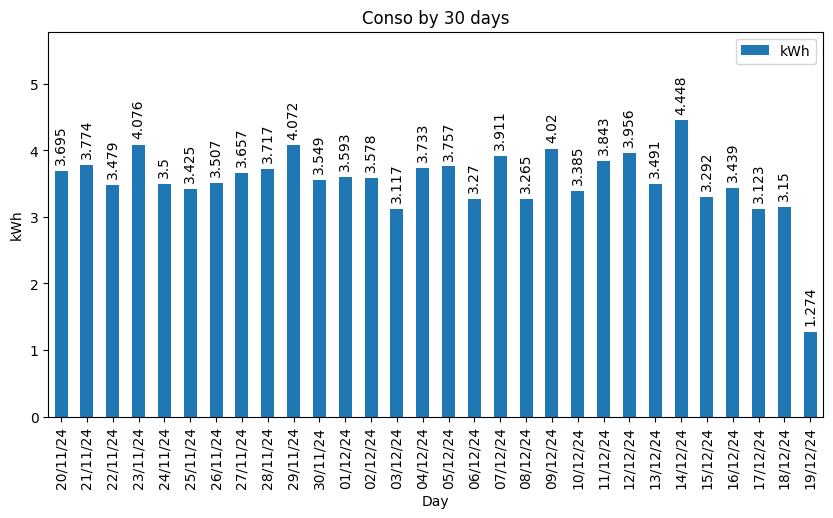

In [730]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [731]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
20/11/24    3.695
21/11/24    3.774
22/11/24    3.479
23/11/24    4.076
24/11/24    3.500
25/11/24    3.425
26/11/24    3.507
27/11/24    3.657
28/11/24    3.717
29/11/24    4.072
30/11/24    3.549
01/12/24    3.593
02/12/24    3.578
03/12/24    3.117
04/12/24    3.733
05/12/24    3.757
06/12/24    3.270
07/12/24    3.911
08/12/24    3.265
09/12/24    4.020
10/12/24    3.385
11/12/24    3.843
12/12/24    3.956
13/12/24    3.491
14/12/24    4.448
15/12/24    3.292
16/12/24    3.439
17/12/24    3.123
18/12/24    3.150
19/12/24    1.274
Name: kWh, dtype: float64

In [732]:
x_labels=df_grp.tail(span).index
x_labels

Index(['20/11/24', '21/11/24', '22/11/24', '23/11/24', '24/11/24', '25/11/24',
       '26/11/24', '27/11/24', '28/11/24', '29/11/24', '30/11/24', '01/12/24',
       '02/12/24', '03/12/24', '04/12/24', '05/12/24', '06/12/24', '07/12/24',
       '08/12/24', '09/12/24', '10/12/24', '11/12/24', '12/12/24', '13/12/24',
       '14/12/24', '15/12/24', '16/12/24', '17/12/24', '18/12/24', '19/12/24'],
      dtype='object', name='days')

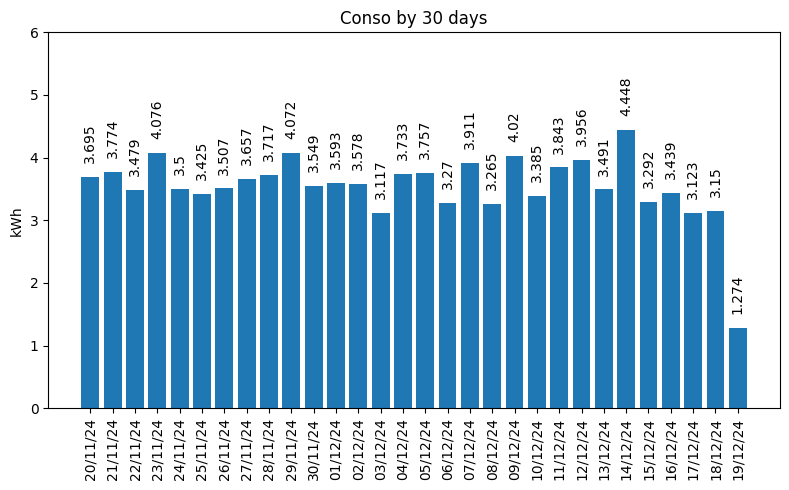

In [733]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [734]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

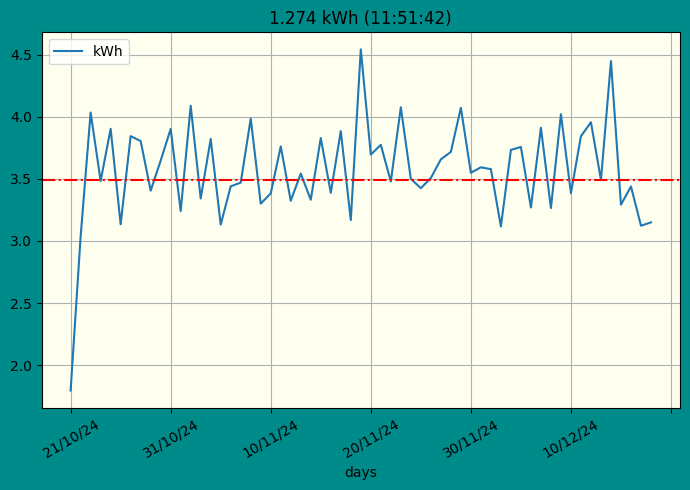

In [735]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

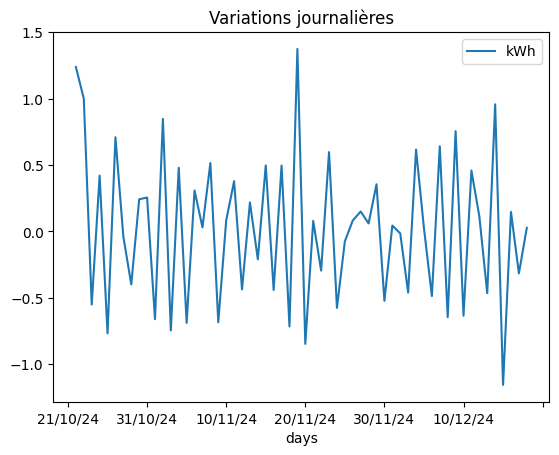

In [736]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [737]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:57:33.083384,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:57:54.941384,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:58:16.942384,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:58:38.870384,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:59:00.761384,21/08/23,19
...,...,...,...,...,...,...,...,...
1699287,6525,0.55,6.525,551.724138,41961207239,2024-12-19 11:50:38.388384,19/12/24,11
1699288,6448,0.56,6.448,558.312655,41961213687,2024-12-19 11:50:44.836384,19/12/24,11
1699289,6530,0.55,6.530,551.301685,41961220217,2024-12-19 11:50:51.366384,19/12/24,11
1699290,6545,0.55,6.545,550.038197,41961226762,2024-12-19 11:50:57.911384,19/12/24,11


In [738]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [739]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [740]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [741]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [742]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,720
22/08/23,3701
23/08/23,4235
24/08/23,3688
25/08/23,4124
...,...
15/12/24,3292
16/12/24,3439
17/12/24,3123


In [743]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:57:33.083384,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:57:54.941384,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:58:16.942384,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:58:38.870384,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:59:00.761384,21/08/23,19
...,...,...,...,...,...,...,...,...
1699287,6525,0.55,6.525,551.724138,41961207239,2024-12-19 11:50:38.388384,19/12/24,11
1699288,6448,0.56,6.448,558.312655,41961213687,2024-12-19 11:50:44.836384,19/12/24,11
1699289,6530,0.55,6.530,551.301685,41961220217,2024-12-19 11:50:51.366384,19/12/24,11
1699290,6545,0.55,6.545,550.038197,41961226762,2024-12-19 11:50:57.911384,19/12/24,11


In [744]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
19/12/24 11    1699287  19/12/24    11  0.55
               1699288  19/12/24    11  0.56
               1699289  19/12/24    11  0.55
               1699290  19/12/24    11  0.55
               1699291  19/12/24    11  0.55

[1699292 rows x 3 columns]

In [745]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [746]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [747]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,720,720
22/08/23,3701,3701
23/08/23,4235,4235
24/08/23,3688,3688
25/08/23,4124,4124
...,...,...
15/12/24,3292,3292
16/12/24,3439,3439
17/12/24,3123,3123


In [748]:
grp_by_day['kWh'].cumsum()

days
21/08/23        720
22/08/23       4421
23/08/23       8656
24/08/23      12344
25/08/23      16468
             ...   
15/12/24    1688306
16/12/24    1691745
17/12/24    1694868
18/12/24    1698018
19/12/24    1699292
Name: kWh, Length: 487, dtype: int64

In [749]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19       7
         20     173
         21     281
         22     129
         23     130
...             ...
19/12/24 07     101
         08     100
         09      99
         10      99
         11     171

[11657 rows x 1 columns]

In [750]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19             7
          20           180
          21           461
          22           590
          23           720
                    ...   
19/12/24  07       1698823
          08       1698923
          09       1699022
          10       1699121
          11       1699292
Name: kWh, Length: 11657, dtype: int64

In [751]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19       7       7    NaN
         20     173     180  166.0
         21     281     461  108.0
         22     129     590 -152.0
         23     130     720    1.0
...             ...     ...    ...
19/12/24 07     101     805    2.0
         08     100     905   -1.0
         09      99    1004   -1.0
         10      99    1103    0.0
         11     171    1274   72.0

[11657 rows x 3 columns]

In [752]:
today, grp_by_dayhours.loc[today]

('19/12/24',
        kWh  cumsum  diff
 hours                   
 00     110     110   NaN
 01     102     212  -8.0
 02     100     312  -2.0
 03     102     414   2.0
 04      95     509  -7.0
 05      96     605   1.0
 06      99     704   3.0
 07     101     805   2.0
 08     100     905  -1.0
 09      99    1004  -1.0
 10      99    1103   0.0
 11     171    1274  72.0)

Text(0.5, 1.0, 'Cumul journalier')

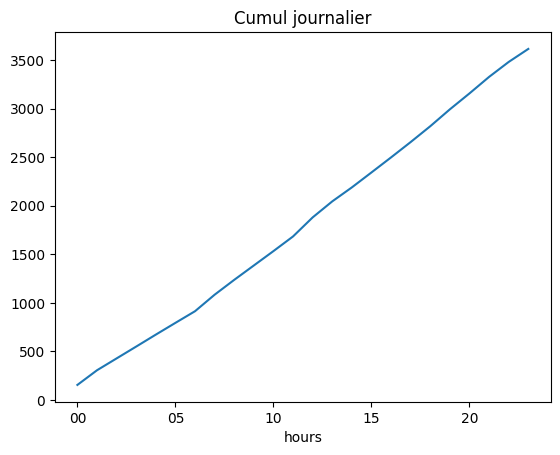

In [753]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

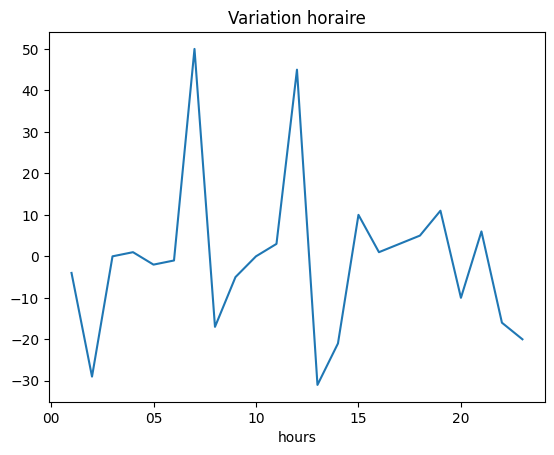

In [754]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [755]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

487

In [756]:
df_grp.tail(n)['kWh'].describe()


count    487.000000
mean       3.489306
std        0.695384
min        0.720000
25%        3.336500
50%        3.627000
75%        3.874500
max        5.110000
Name: kWh, dtype: float64

In [757]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '487 days')

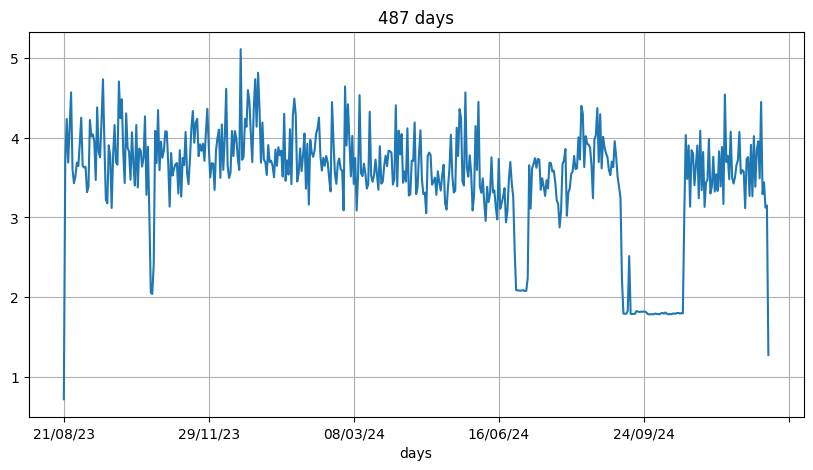

In [758]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

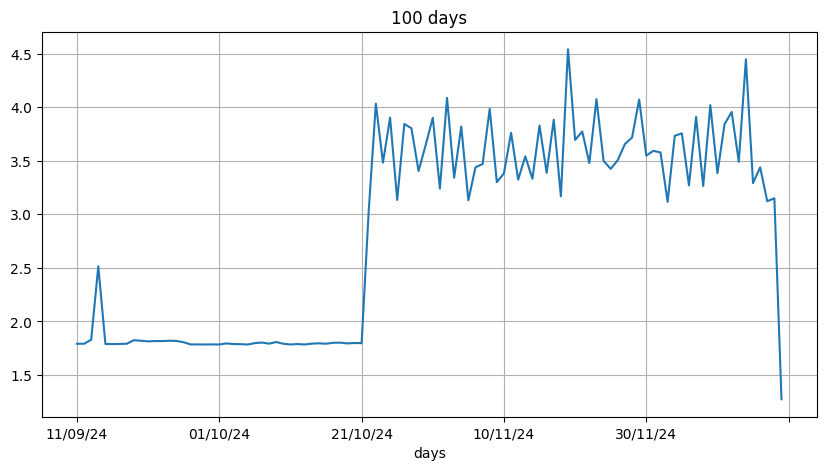

In [759]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [760]:
df_grp['kWh']

days
21/08/23    0.720
22/08/23    3.701
23/08/23    4.235
24/08/23    3.688
25/08/23    4.124
            ...  
15/12/24    3.292
16/12/24    3.439
17/12/24    3.123
18/12/24    3.150
19/12/24    1.274
Name: kWh, Length: 487, dtype: float64

In [761]:
df_grp.describe()

,kWh
count,487.000000
mean,3.489306
std,0.695384
min,0.720000
25%,3.336500
50%,3.627000
75%,3.874500
max,5.110000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

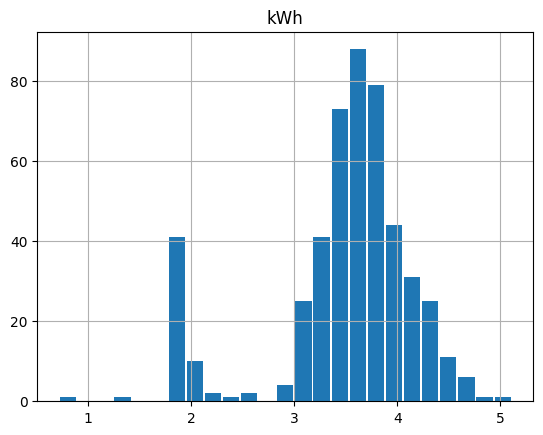

In [762]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [763]:
df_grp.tail(span)['kWh']

days
11/09/24    1.792
12/09/24    1.792
13/09/24    1.829
14/09/24    2.515
15/09/24    1.790
            ...  
15/12/24    3.292
16/12/24    3.439
17/12/24    3.123
18/12/24    3.150
19/12/24    1.274
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [764]:
day

'19/12/24'

In [765]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,110,110,NaN
01,102,212,-8.0
02,100,312,-2.0
03,102,414,2.0
04,95,509,-7.0
05,96,605,1.0
06,99,704,3.0
07,101,805,2.0
08,100,905,-1.0


In [766]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


12

In [767]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 13)

In [768]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [769]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [770]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
Name: days, dtype: float64

In [771]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [772]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 00 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     12 non-null     int64  
 1   cumsum  12 non-null     int64  
 2   diff    11 non-null     float64
 3   days    12 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 480.0+ bytes


In [773]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
Name: days, dtype: float64

In [774]:
day

'19/12/24'

In [775]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,110,110,NaN,1.0
01,102,212,-8.0,2.0
02,100,312,-2.0,3.0
03,102,414,2.0,4.0
04,95,509,-7.0,5.0
05,96,605,1.0,6.0
06,99,704,3.0,7.0
07,101,805,2.0,8.0
08,100,905,-1.0,9.0


Text(0.5, 1.0, '19/12/24')

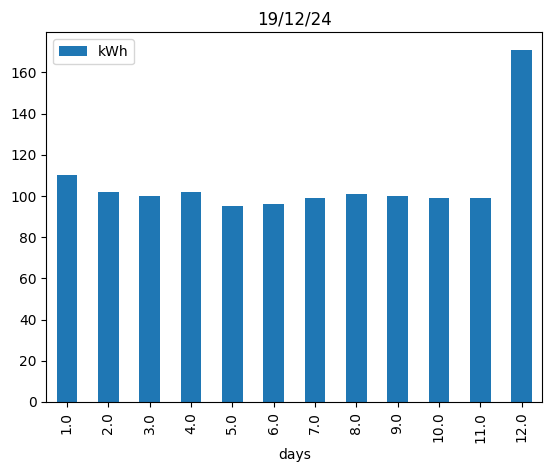

In [776]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [777]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11'], dtype='object', name='hours')

# Conso du jour


In [778]:
groupedbyhour.count()

,kWh
hours,
00,110
01,102
02,100
03,102
04,95
05,96
06,99
07,101
08,100


In [779]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    149
01    168
02    157
03    163
04    166
05    146
06    132
07    127
08    118
09    130
10    115
11    130
12    130
13    173
14    157
15    145
16    388
17    748
18    244
19    304
20    282
21    319
22    327
23    192
Name: kWh, dtype: int64

In [780]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

284.699

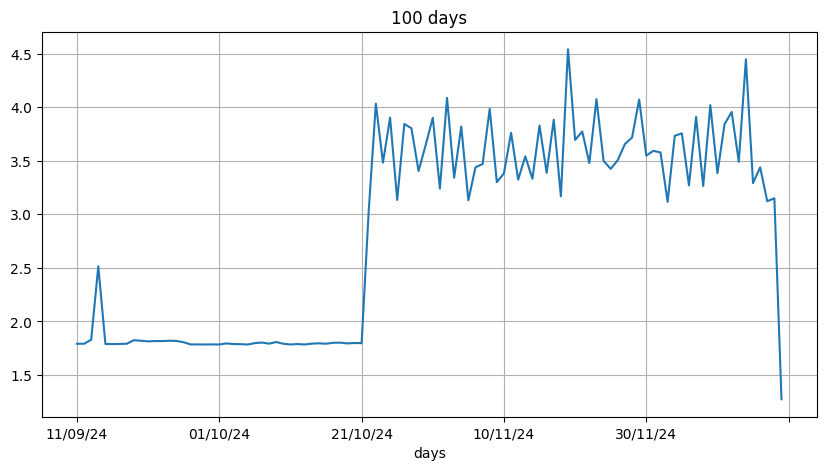

In [781]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [782]:
df_grp.tail(1)

,kWh
days,
19/12/24,1.274


In [783]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

1.274

In [784]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

109.44947290420532


# Today

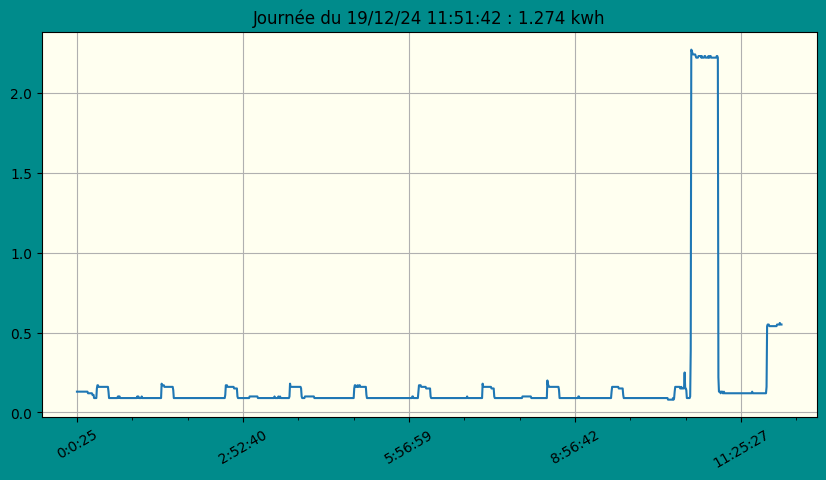

In [785]:
show(today,bgcolor='ivory')

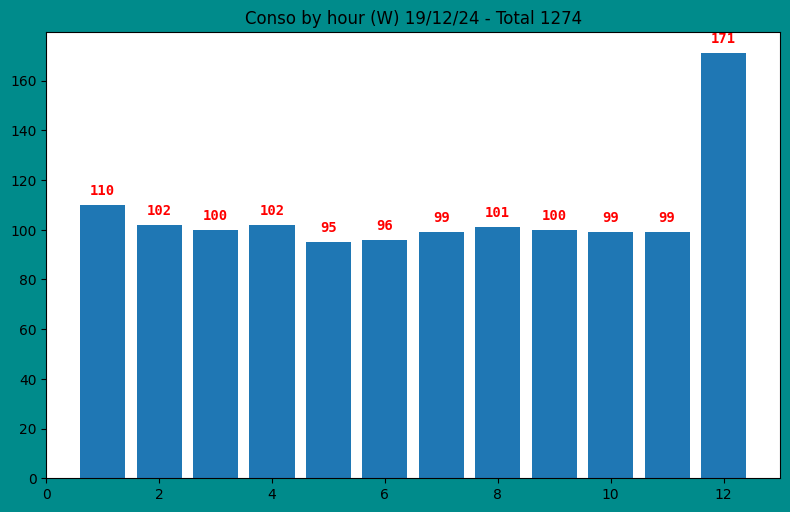

In [786]:
conso_by_hour(today)

In [787]:
day = '17/12/24'

('17/12/24', None)

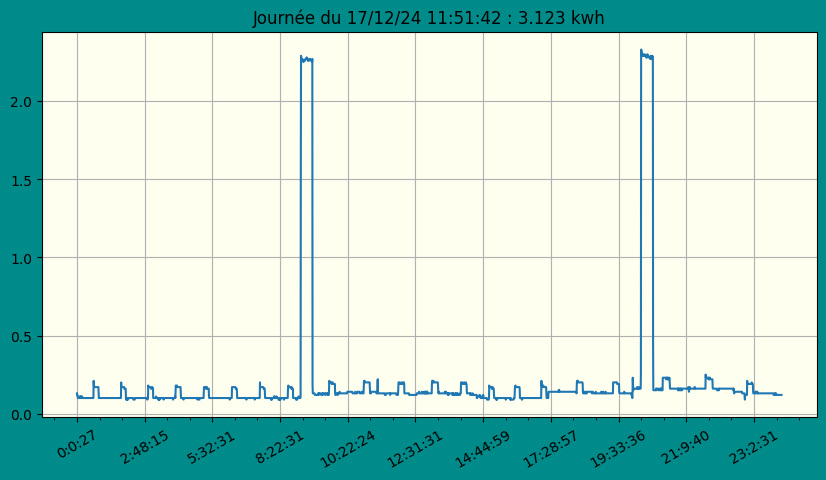

In [788]:
day, show(day,bgcolor='ivory')

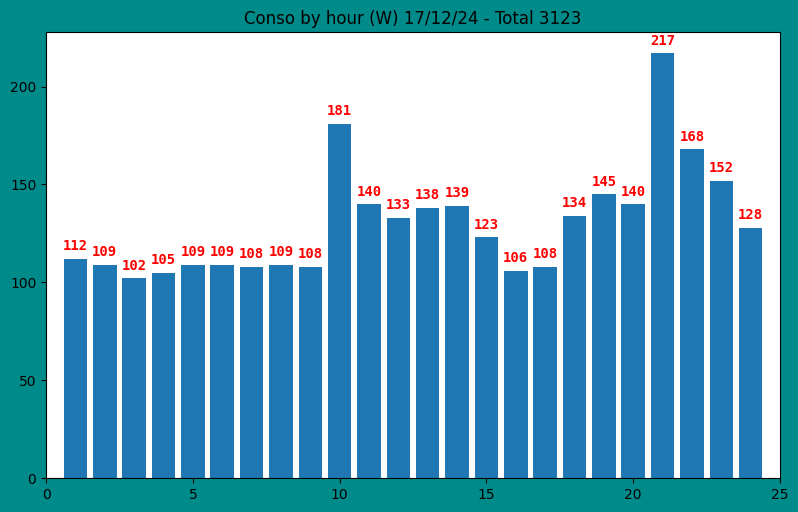

In [789]:
conso_by_hour(day)

('21/12/23', None)

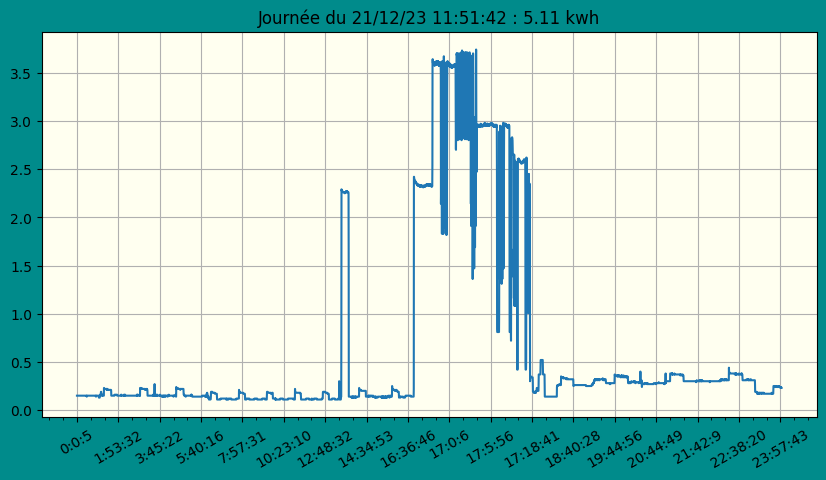

In [790]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

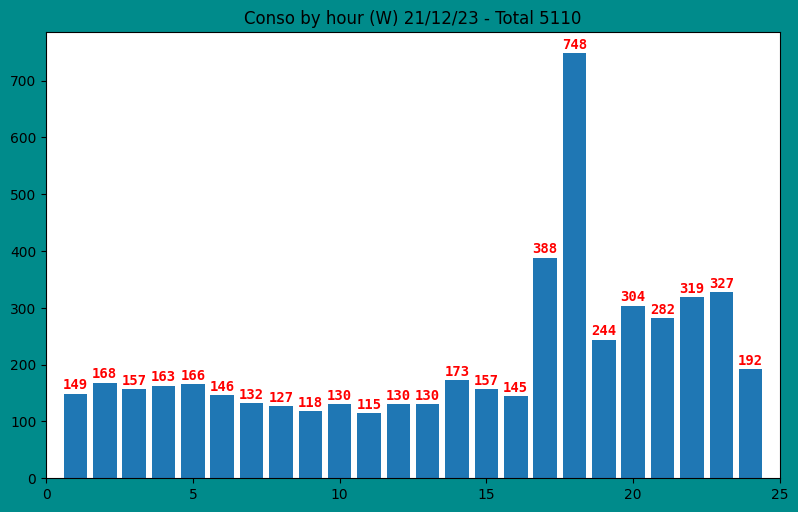

In [791]:
conso_by_hour(day)

In [792]:
sum(data)

5110

In [793]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,110,110,NaN,1.0
01,102,212,-8.0,2.0
02,100,312,-2.0,3.0
03,102,414,2.0,4.0
04,95,509,-7.0,5.0
05,96,605,1.0,6.0
06,99,704,3.0,7.0
07,101,805,2.0,8.0
08,100,905,-1.0,9.0


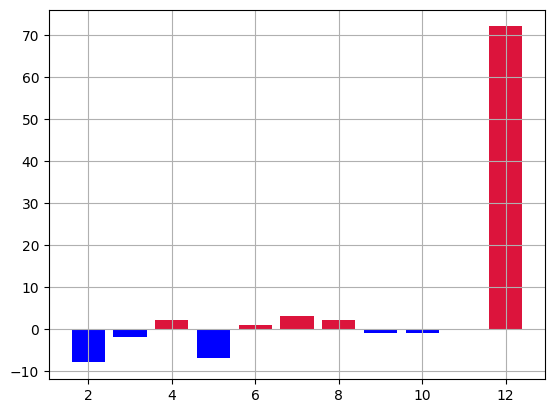

In [794]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [795]:
data

hours
00    149
01    168
02    157
03    163
04    166
05    146
06    132
07    127
08    118
09    130
10    115
11    130
12    130
13    173
14    157
15    145
16    388
17    748
18    244
19    304
20    282
21    319
22    327
23    192
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

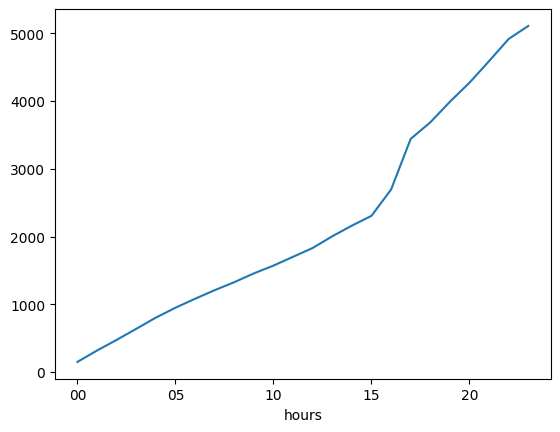

In [796]:
data.cumsum().plot()


<Axes: xlabel='hours'>

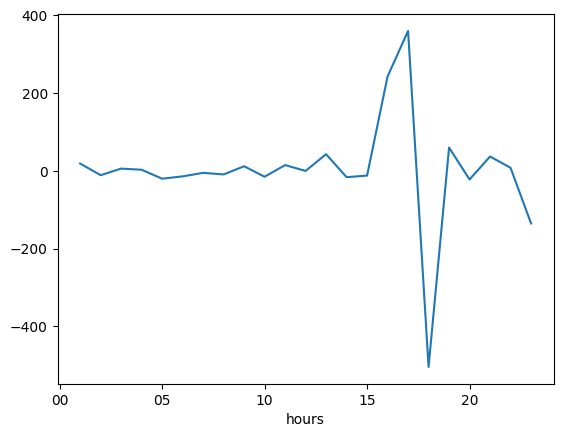

In [797]:
# evolution par heure
data.diff().plot()

In [798]:
data.diff().describe()

count     23.000000
mean       1.869565
std      146.225015
min     -504.000000
25%      -14.500000
50%        0.000000
75%       17.000000
max      360.000000
Name: kWh, dtype: float64

<Axes: >

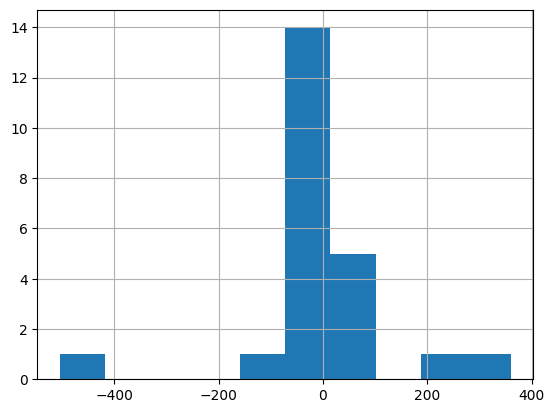

In [799]:
data.diff().hist()

# Test sauvegarde

In [800]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [801]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [802]:
#conso_byhour(day)

In [803]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


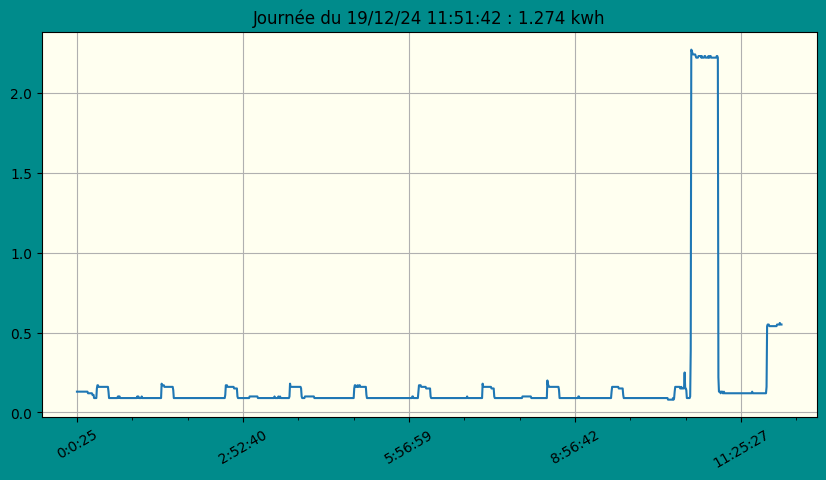

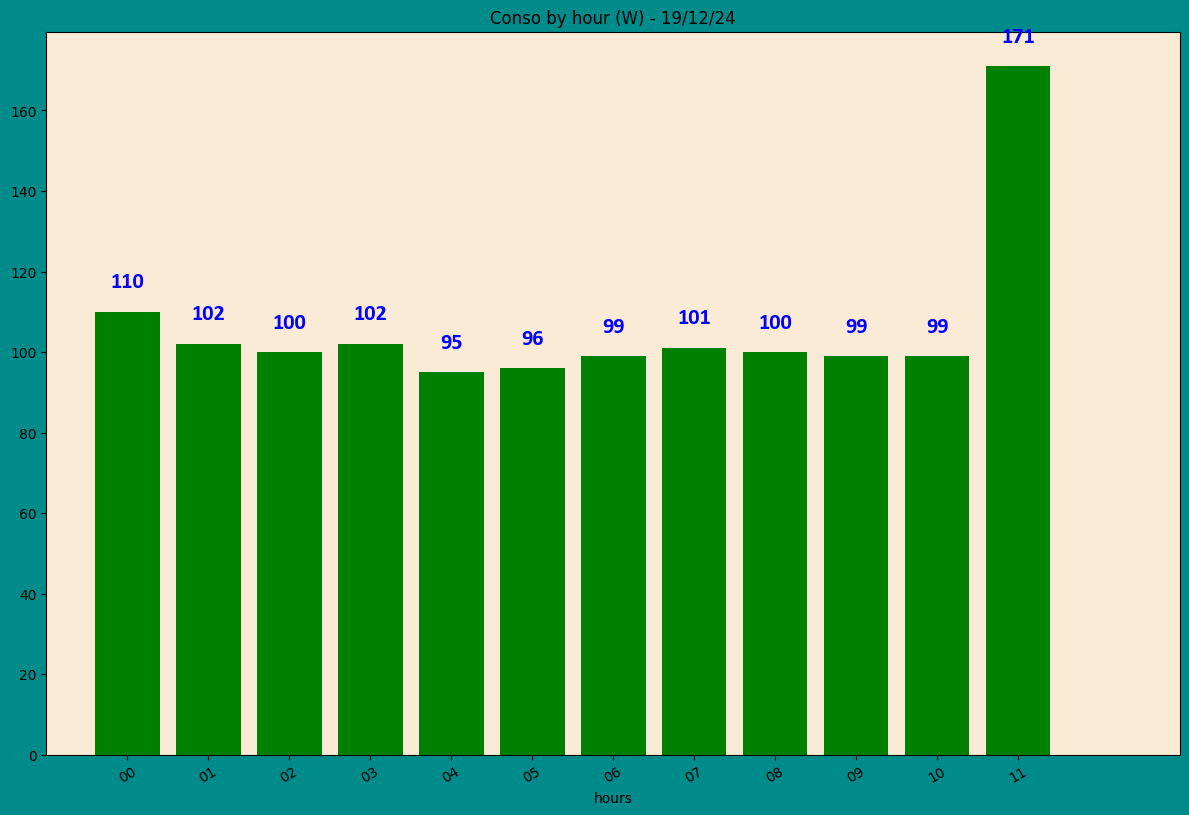

In [804]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [805]:
month.describe()


count    30.000000
mean      3.645467
std       0.356307
min       3.117000
25%       3.428500
50%       3.585500
75%       3.825750
max       4.542000
Name: kWh, dtype: float64

<Axes: >

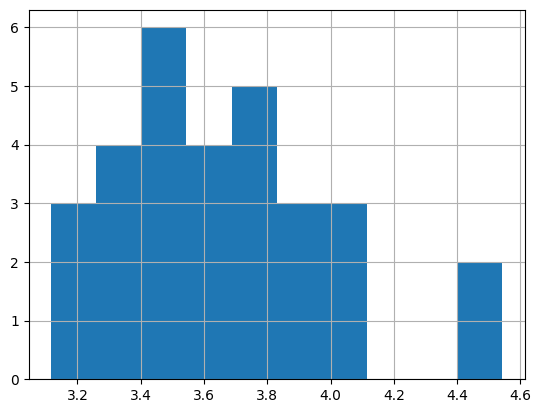

In [806]:
month.hist()

<Axes: xlabel='days'>

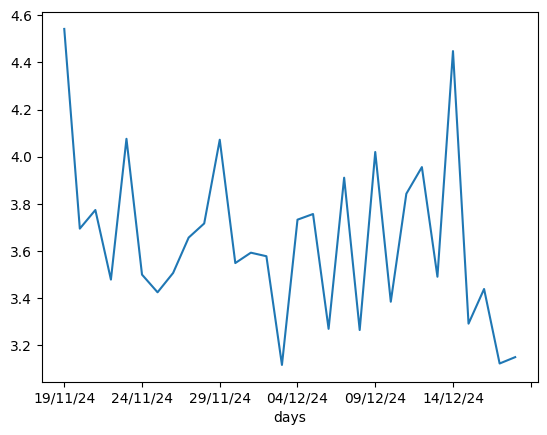

In [807]:
month.plot()

In [808]:
# date with max conso in 1 month
month.idxmax()

'19/11/24'

In [809]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'19/11/24'

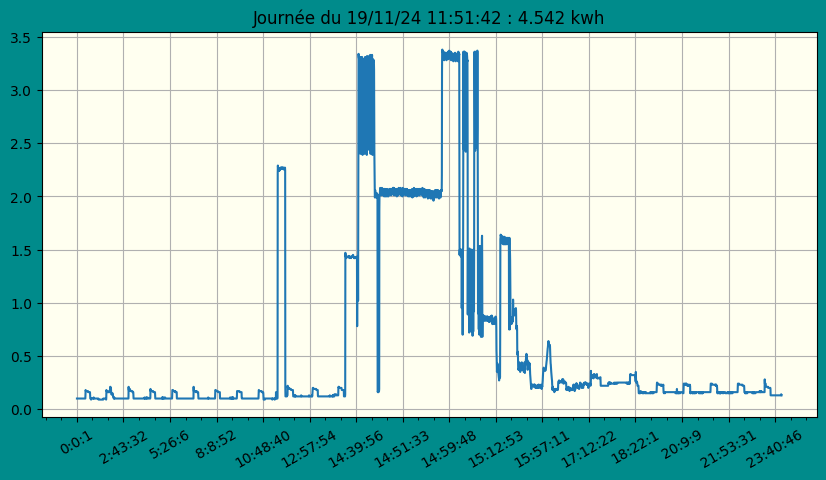

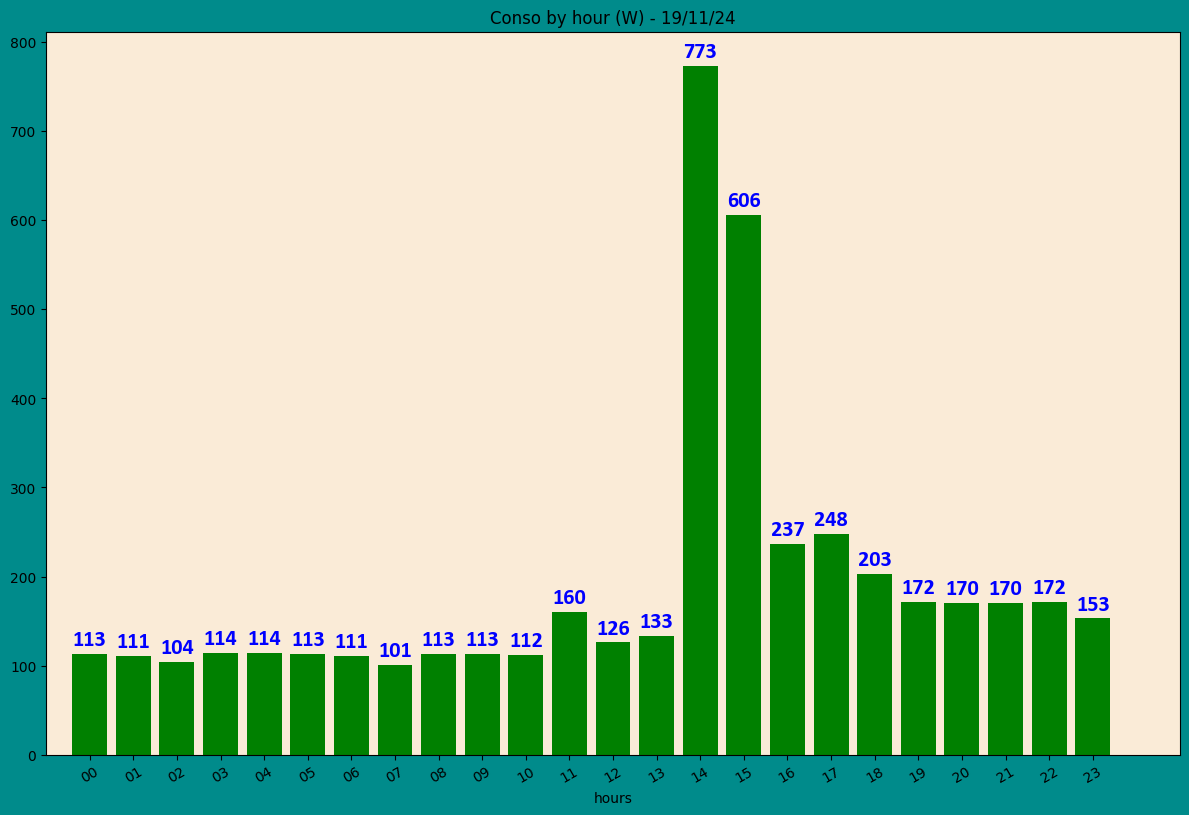

In [810]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [811]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 19       7       7    NaN   NaN
         20     173     180  166.0   NaN
         21     281     461  108.0   NaN
         22     129     590 -152.0   NaN
         23     130     720    1.0   NaN
...             ...     ...    ...   ...
19/12/24 07     101     805    2.0   8.0
         08     100     905   -1.0   9.0
         09      99    1004   -1.0  10.0
         10      99    1103    0.0  11.0
         11     171    1274   72.0  12.0

[11657 rows x 4 columns]

In [812]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,113,113,NaN,NaN
01,111,224,-2.0,NaN
02,104,328,-7.0,NaN
03,114,442,10.0,NaN
04,114,556,0.0,NaN
05,113,669,-1.0,NaN
06,111,780,-2.0,NaN
07,101,881,-10.0,NaN
08,113,994,12.0,NaN


In [813]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

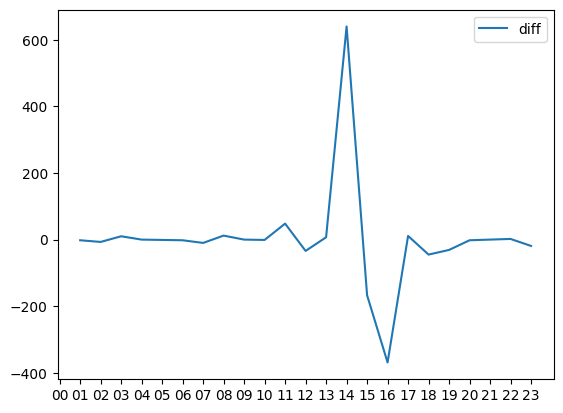

In [814]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

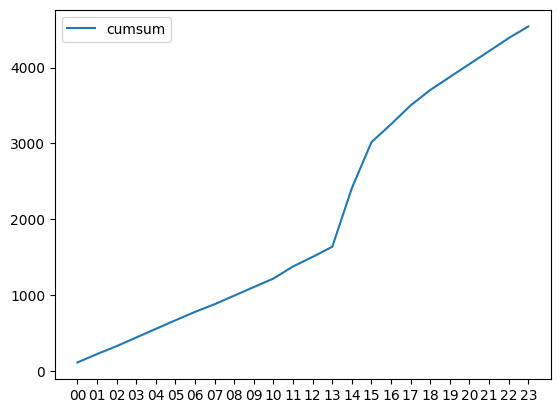

In [815]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [816]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB